In [378]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt

Stay-At-Home Fund - JNJ - Company Specific Overview

In [379]:
jnj_prices = pd.read_csv('Stay At Home Fund/JNJ.csv')
jnj_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,2.242188,2.453125,2.195313,2.437500,0.975025,141102400
1,1985-02-01,2.390625,2.507813,2.312500,2.460938,0.984400,131019200
2,1985-03-01,2.437500,2.632813,2.421875,2.625000,1.058038,149992000
3,1985-04-01,2.609375,2.796875,2.523438,2.742188,1.105271,183592000
4,1985-05-01,2.726563,2.960938,2.679688,2.937500,1.183993,136675200
...,...,...,...,...,...,...,...
466,2023-11-01,149.190002,155.139999,145.639999,154.660004,152.275131,131078100
467,2023-12-01,156.440002,160.020004,151.770004,156.740005,155.558899,146527600
468,2024-01-01,156.929993,163.580002,156.789993,158.899994,157.702606,138190400
469,2024-02-01,158.160004,162.250000,154.839996,161.380005,160.163925,158288200


In [380]:
sp500 = pd.read_csv('sp500_index.csv')
sp500

,Date,Price
0,2014-03-20,1872.01
1,2014-03-21,1866.52
2,2014-03-24,1857.44
3,2014-03-25,1865.62
4,2014-03-26,1852.56
...,...,...
2512,2024-03-13,5165.31
2513,2024-03-14,5150.48
2514,2024-03-15,5117.09
2515,2024-03-18,5149.42


In [381]:
jnj_prices['Date'] = pd.to_datetime(jnj_prices['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

jnj_prices.set_index('Date', inplace=True)
sp500.set_index('Date', inplace= True)
sp500 = sp500.resample('MS').first()

In [382]:
jnj_prices = jnj_prices[jnj_prices.index > '2014-03-01']

In [383]:
jnj_quantity = 50000/jnj_prices.loc['2014-04-1','Close']
sp500_quantity = 50000/sp500.loc['2014-04-01','Price']




In [384]:

jnj_portfolio_val = pd.DataFrame({'Date':jnj_prices.index,'Value':jnj_prices['Close']})
jnj_portfolio_val.set_index('Date',inplace=True)

In [385]:
jnj_portfolio_val['Value'] *= jnj_quantity
jnj_portfolio_val

,Value
Date,
2014-04-01,50000.000000
2014-05-01,50083.916477
2014-06-01,51643.796015
2014-07-01,49407.638963
2014-08-01,51204.463410
...,...
2023-11-01,76345.148817
2023-12-01,77371.904163
2024-01-01,78438.144156


In [386]:
sp500['Price'] *= sp500_quantity
sp500

,Price
Date,
2014-03-01,49641.743392
2014-04-01,50000.000000
2014-05-01,49951.207094
2014-06-01,51046.130510
2014-07-01,52328.270185
...,...
2023-11-01,112379.078451
2023-12-01,121839.863804
2024-01-01,125769.814163


In [387]:
sp500.rename(columns={'Price': 'Value'}, inplace=True)



In [388]:
# Assuming both sp500 and jnj_portfolio_val have a 'Date' index and we've already renamed our columns of interest to 'Value'
sp_jnj = pd.merge(sp500, jnj_portfolio_val, left_index=True, right_index=True, suffixes=('_sp500', '_jnj'))
sp_jnj

,Value_sp500,Value_jnj
Date,,
2014-04-01,50000.000000,50000.000000
2014-05-01,49951.207094,50083.916477
2014-06-01,51046.130510,51643.796015
2014-07-01,52328.270185,49407.638963
2014-08-01,51050.903729,51204.463410
...,...,...
2023-11-01,112379.078451,76345.148817
2023-12-01,121839.863804,77371.904163
2024-01-01,125769.814163,78438.144156


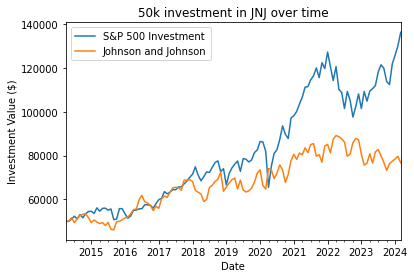

In [389]:
sp_jnj.plot()
plt.title('50k investment in JNJ over time')
plt.ylabel('Investment Value ($)')
plt.xlabel('Date')
plt.legend(['S&P 500 Investment', 'Johnson and Johnson'])
plt.show()

In [390]:
lyg_prices = pd.read_csv('Out In The World Fund/LYG.csv')
lyg_prices['Date'] = pd.to_datetime(lyg_prices['Date'])
lyg_prices.set_index('Date', inplace=True)

In [391]:
lyg_quantity = 50000/lyg_prices.loc['2014-04-01','Close']
lyg_quantity

9671.17988394584

In [392]:
lyg_val = pd.DataFrame({'Date':lyg_prices.index,'Value':lyg_prices['Close']})
lyg_val.set_index('Date', inplace=True)
lyg_val['Value'] *= lyg_quantity

In [393]:
# Assuming both sp500 and jnj_portfolio_val have a 'Date' index and we've already renamed our columns of interest to 'Value'
sp_lyg = pd.merge(sp500, lyg_val, left_index=True, right_index=True, suffixes=('_sp500', '_lyg'))
sp_lyg

,Value_sp500,Value_lyg
Date,,
2014-03-01,49641.743392,49226.305609
2014-04-01,50000.000000,50000.000000
2014-05-01,49951.207094,50870.406190
2014-06-01,51046.130510,49709.864603
2014-07-01,52328.270185,48549.323017
...,...,...
2023-11-01,112379.078451,21179.883946
2023-12-01,121839.863804,23114.119923
2024-01-01,125769.814163,20406.189555


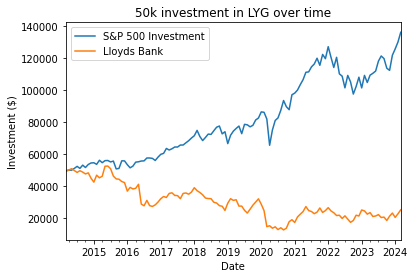

In [394]:
sp_lyg.plot()
plt.title('50k investment in LYG over time')
plt.xlabel('Date')
plt.ylabel('Investment ($)')
plt.legend(['S&P 500 Investment','Lloyds Bank'])
plt.show()

In [395]:
elf_prices = pd.read_csv('Life On The Edge Fund/ELF.csv')
elf_prices['Date'] = pd.to_datetime(elf_prices['Date'])
elf_prices.set_index('Date', inplace=True)

In [396]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500 = sp500.resample('MS').first()

sp500.rename(columns={'Price': 'Value'}, inplace=True)
sp500 = sp500.loc[sp500.index>'2019-03-01']




In [397]:
elf_value = pd.DataFrame({'Date':elf_prices.index,'Value':elf_prices['Close']})
elf_value.set_index('Date', inplace = True)



In [398]:
quantity_sp = 50000/sp500.iloc[0][0]
quantity_elf = 50000/elf_prices.iloc[0]['Close']



In [399]:
sp500['Value']*=quantity_sp
elf_value['Value']*=quantity_elf

In [400]:
sp500['Value']

Date
2019-04-01    50000.000000
2019-05-01    50985.982792
2019-06-01    47859.576798
2019-07-01    51693.993073
2019-08-01    51506.178523
2019-09-01    50681.503493
2019-10-01    51274.069734
2019-11-01    53482.852549
2019-12-01    54301.772816
2020-01-01    56812.593515
2020-02-01    56656.866130
2020-03-01    53889.522494
2020-04-01    43082.251263
2020-05-01    49363.837067
2020-06-01    53287.888141
2020-07-01    54336.475783
2020-08-01    57453.639277
2020-09-01    61500.109864
2020-10-01    58956.678839
2020-11-01    57726.205797
2020-12-01    63868.282186
2021-01-01    64534.439643
2021-02-01    65811.125178
2021-03-01    68042.578274
2021-04-01    70101.214081
2021-05-01    73114.443061
2021-06-01    73278.017850
2021-07-01    75334.037856
2021-08-01    76506.265717
2021-09-01    78894.143744
2021-10-01    75981.012769
2021-11-01    80456.300420
2021-12-01    78701.446364
2022-01-01    83645.660036
2022-02-01    79285.642040
2022-03-01    75095.476756
2022-04-01    79273.783

In [401]:
combined = pd.merge(sp500, elf_value, left_index=True, right_index=True, suffixes=['_sp500','_elf'])
combined

,Value_sp500,Value_elf
Date,,
2019-04-01,50000.000000,50000.000000
2019-05-01,50985.982792,39835.809226
2019-06-01,47859.576798,55121.188428
2019-07-01,51693.993073,64855.355747
2019-08-01,51506.178523,63799.843628
2019-09-01,50681.503493,68451.915559
2019-10-01,51274.069734,65676.305708
2019-11-01,53482.852549,64777.169664
2019-12-01,54301.772816,63057.071931


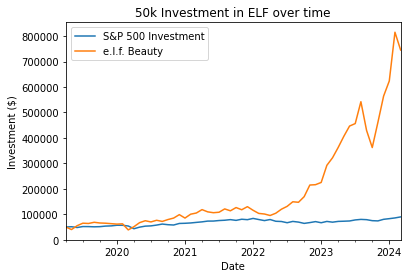

In [403]:
combined.plot()
plt.title('50k Investment in ELF over time')
plt.xlabel('Date')
plt.ylabel('Investment ($)')
plt.legend(['S&P 500 Investment','e.l.f. Beauty'])
plt.show()
